# **Estudio de la Calidad del Vino**
Este dataset fue tomado de Kaggle,
https://www.kaggle.com/rajyellow46/wine-quality

Como información previa tenemos que:

The dataset was downloaded from the UCI Machine Learning Repository.

*The two datasets are related to red and white variants* of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). *Outlier detection algorithms could be used to detect the few excellent or poor wines.* Also, we are not sure if all input variables are relevant. So *it could be interesting to test feature selection methods.*

Two datasets were combined and few values were randomly removed.

Attribute Information:

*Input variables (based on physicochemical tests):*
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

*Output variable (based on sensory data):*
12 - quality (score between 0 and 10)

Acknowledgements/Bibliography:
[Cortez et al., 2009] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
https://www.scitepress.org/Papers/2015/55519/55519.pdf


In [1]:
# Cargamos las librerías 
import sys
import seaborn as sns
import numpy as np 
import random 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Para realizar los gráficos debajo de la celda de código
%matplotlib inline

In [2]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/agustinfernandez/TPUNSAM/master/winequalityN.csv')

In [ ]:
# Exploramos rápidamente
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
df.info()

# Data frame de 13 columnas y 6496 filas 
# 1 columna de tipo string y 12 de tipo punto flotante
# Nuestro target será la calidad del vino -> interger (score between 0 and 10, being 10 de best quality)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Si sacamos los nulos estamos tirando 38 datos

In [ ]:
# Estadística básica sobre cada columna
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


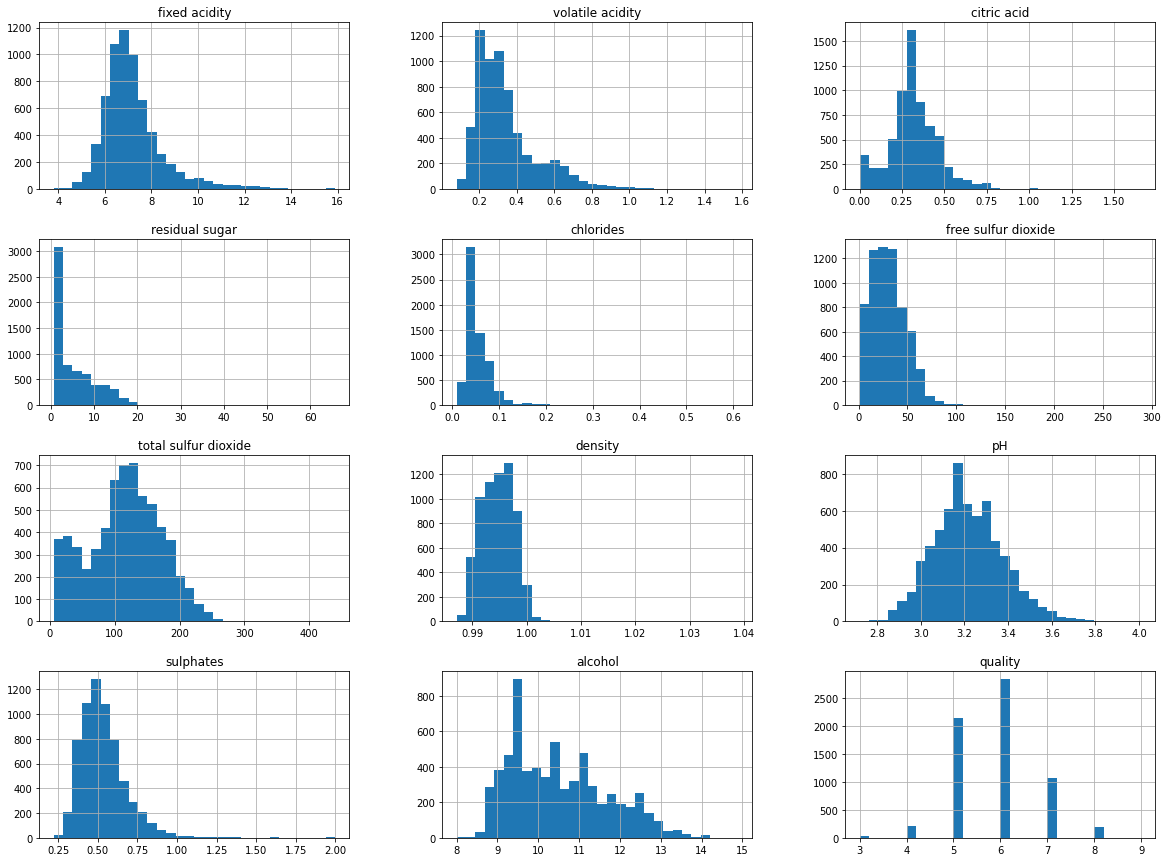

In [ ]:
# Veamos los histogramas
df.hist(bins=30, figsize=(20,15));

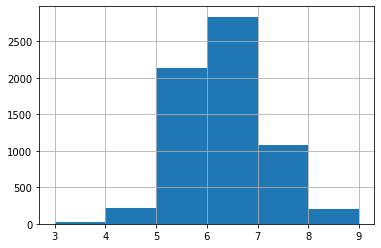

In [ ]:
df['quality'].hist(bins=6);

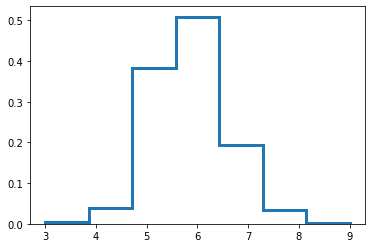

In [ ]:
plt.hist(df['quality'], 7, density=True, histtype='step', lw=3);

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Correlacion entre los datos

In [ ]:
columnas = df.columns
columnas

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

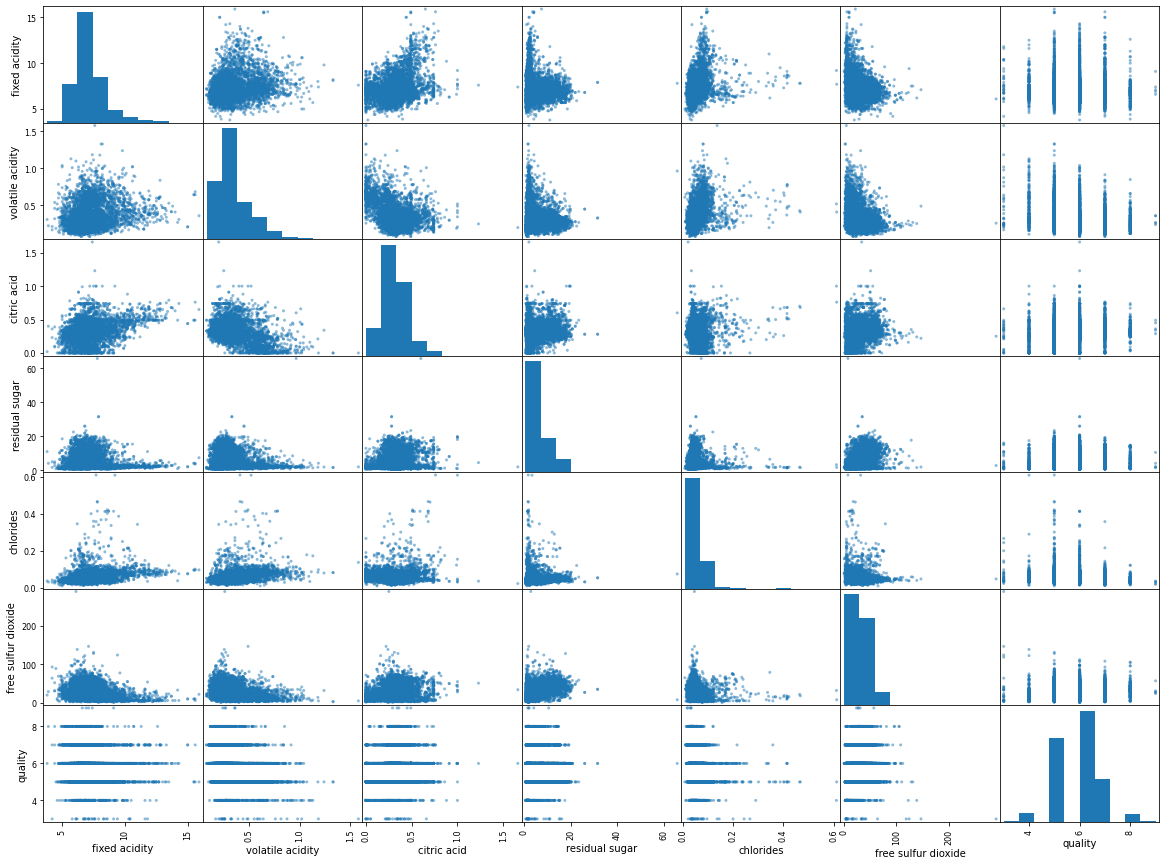

In [ ]:
#Veamos como se distribuyen los datos tomados de a dos
#scatter_matrix(df, figsize=(12, 8));
attributes = ["fixed acidity", "volatile acidity", "citric acid",'residual sugar', 'chlorides', 'free sulfur dioxide',"quality"]
scatter_matrix(df[attributes], figsize=(20, 15));

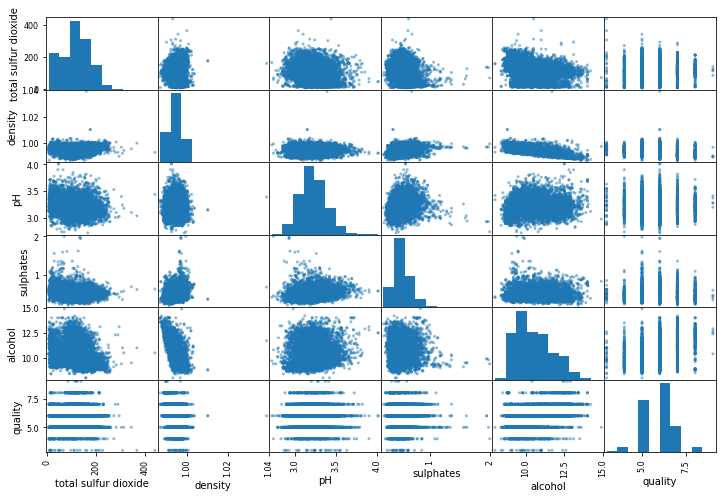

In [ ]:
attributes = ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',"quality"]
scatter_matrix(df[attributes], figsize=(12, 8));

In [ ]:
# Calculamos la matriz de correlación Pearson: muy cerca de 1 o -1 es muy correlacionado
corr_mat = df.corr()
# print(corr_mat)

In [ ]:
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


In [ ]:
#veamos los mas correlacionados:
corr_mat[np.abs(corr_mat)>0.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.552498,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.720934,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,1.000000,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552498,NaN,NaN,NaN,1.000000,NaN,NaN,-0.686745,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Notamos que quality no esta correlacionado con ninguno.... mmmm

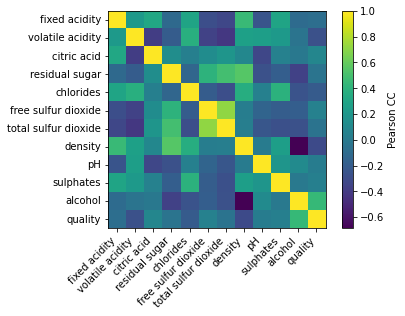

In [ ]:
# Graficamos la matriz de correlación Pearson
plt.imshow(corr_mat)

# Set ticks
xt = plt.xticks(np.arange(12), df.columns[1:], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(12), df.columns[1:], rotation=0, ha='right', va='center')

# Set colorbar
plt.colorbar(label='Pearson CC');

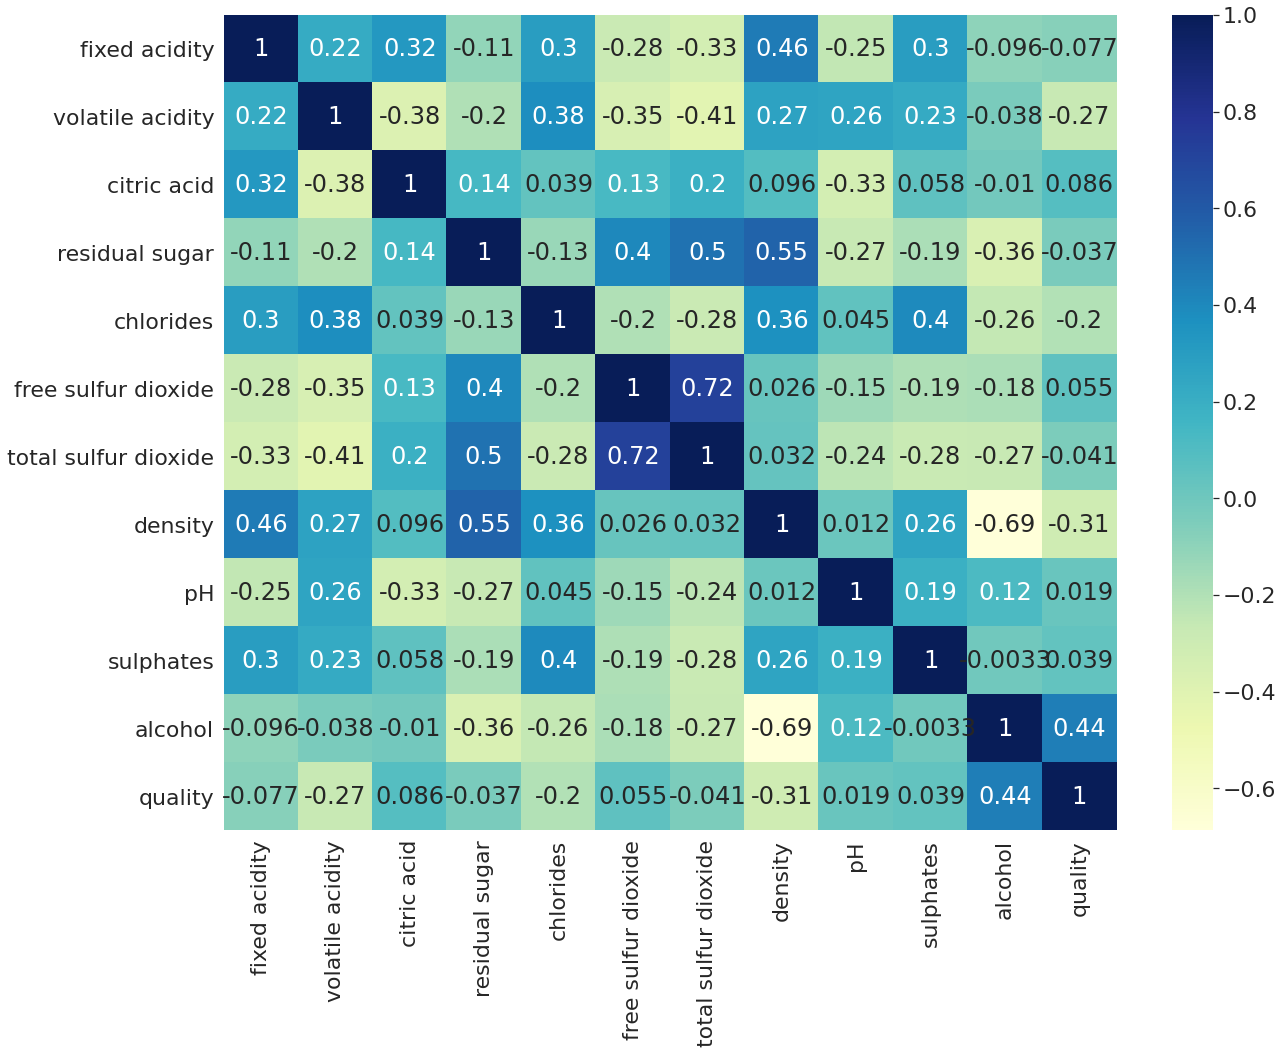

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot = True, cmap="YlGnBu");
#sns.set(font_scale=2);

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Vino tinto, vino blanco...

In [ ]:
#Dividamos los datos entre vinos blancos y tintos:
df_red = df[df['type']=='red']
df_white = df[df['type']=='white']

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


In [ ]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


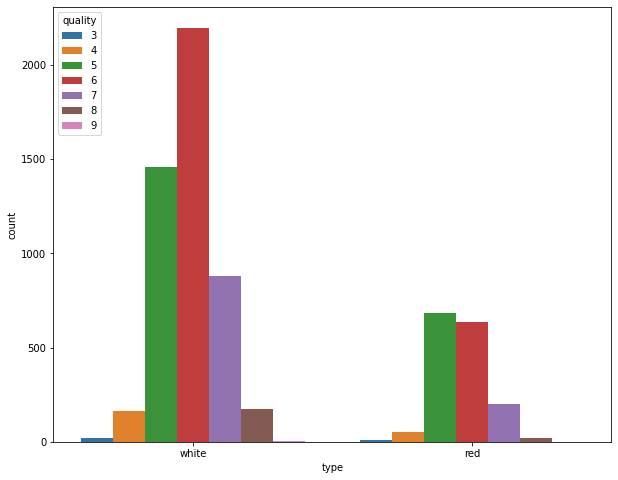

In [ ]:
#  MEJORAR GRAFICO
#sns.histplot(data=df, x="quality", binwidth=10, hue='type')
#df_white['quality'].hist(bins=10, figsize=(10,7))
#df_red['quality'].hist(bins=10, figsize=(10,7))
#plt.hist(df_white['quality'],)

plt.figure(figsize=(10,8))
sns.countplot(x='type',hue='quality',data=df);


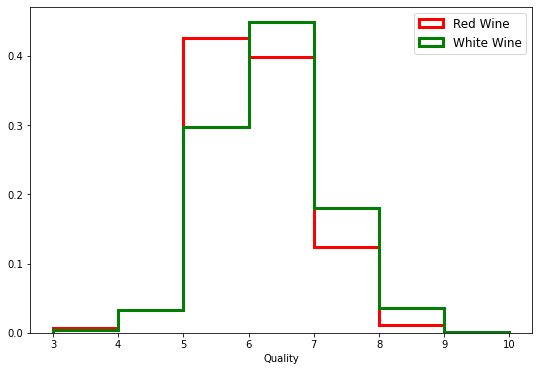

In [ ]:
plt.figure(figsize=(9, 6))
plt.hist(df_red['quality'], bins=[3,4,5,6,7,8,9,10], density=True, histtype='step', lw=3, label='Red Wine', color='red')
plt.hist(df_white['quality'], bins=[3,4,5,6,7,8,9,10], density=True, histtype='step', lw=3, label='White Wine',color='green')
plt.xlabel('Quality')
plt.legend(loc=0, fontsize=12);

Vemos las dos distribuciones muy superpuestas, a priori no vamos a poder distinguirlas...

In [ ]:
df_red['quality'].value_counts()#.sort_values()
#notar que el tinto no tiene ningun vino de calidad 9
#ademas de no tener de calidad 1, 2 y 10 como asi tampoco el blanco

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df_white['quality'].value_counts() #.sort_values(by='quality')
#no tiene de calidad 1, 2 y 10 como asi tampoco el tinto

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Rango de las variables


In [ ]:
df['quality'].min(),df['quality'].max()

(3, 9)

In [ ]:
#['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
# 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
print('fixed acidity:', df['fixed acidity'].min(),df['fixed acidity'].max())
print('volatile acidity:', df['volatile acidity'].min(),df['volatile acidity'].max())
print('citric acid:', df['citric acid'].min(),df['citric acid'].max())
print('residual sugar:', df['residual sugar'].min(),df['residual sugar'].max())
print('chlorides:', df['chlorides'].min(),df['chlorides'].max())
print('free sulfur dioxide:', df['free sulfur dioxide'].min(),df['free sulfur dioxide'].max())
print('total sulfur dioxide:', df['total sulfur dioxide'].min(),df['total sulfur dioxide'].max())
print('density:', df['density'].min(),df['density'].max())
print('pH:', df['pH'].min(),df['pH'].max())
print('sulphates:', df['sulphates'].min(),df['sulphates'].max())
print('alcohol:', df['alcohol'].min(),df['alcohol'].max())



fixed acidity: 3.8 15.9
volatile acidity: 0.08 1.58
citric acid: 0.0 1.66
residual sugar: 0.6 65.8
chlorides: 0.009000000000000001 0.611
free sulfur dioxide: 1.0 289.0
total sulfur dioxide: 6.0 440.0
density: 0.98711 1.03898
pH: 2.72 4.01
sulphates: 0.22 2.0
alcohol: 8.0 14.9


fixed acidity: 3.8 15.9. Google:

volatile acidity: 0.08 1.58. Google:

citric acid: 0.0 1.66. Google:

residual sugar: 0.6 65.8. Google:

chlorides: 0.009 0.611. Google:

free sulfur dioxide: 1.0 289.0

total sulfur dioxide: 6.0 440.0

density: 0.98711 1.03898

pH: 2.72 4.01

Sulphates: 0.22 2.0

Wine ranges from about 5 mg/L (5 parts per million) to about 200 mg/L. The maximum legal limit in the United States is 350 mg/l. A well made dry red wine typically has about 50 mg/l sulfites.

Alcohol: 8.0 14.9


# Outliers en alguna columnas?

con que metodo podemos definir que dato es outlier y cual no

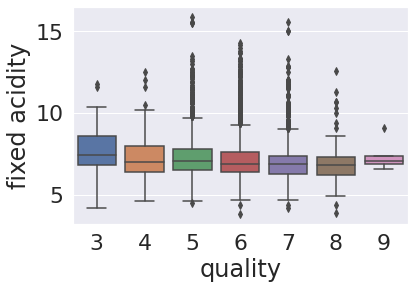

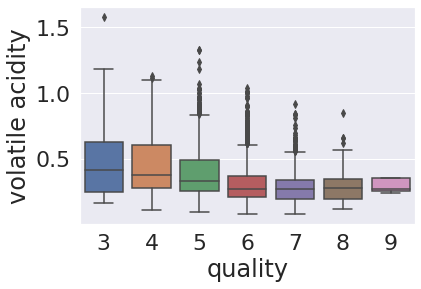

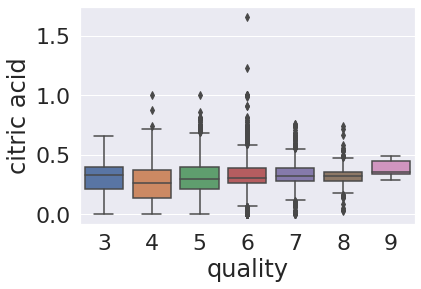

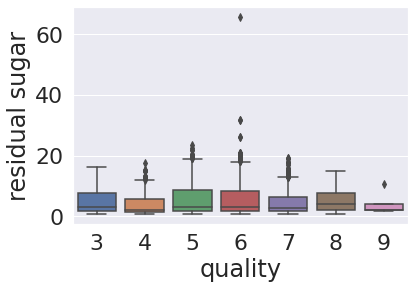

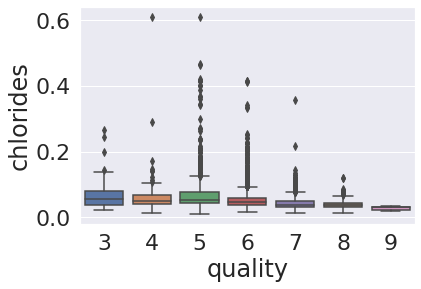

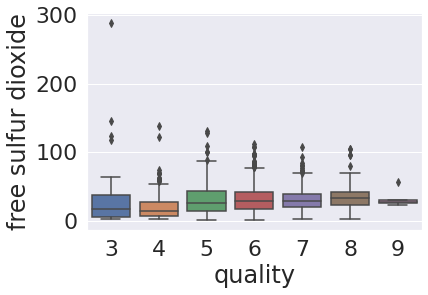

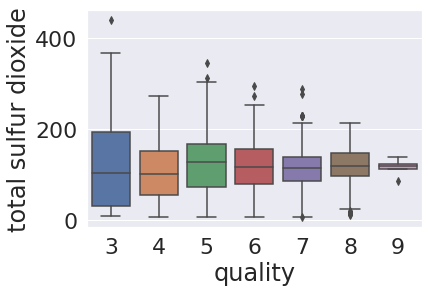

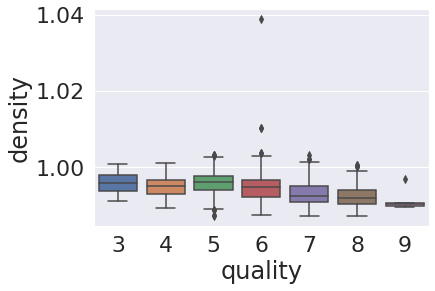

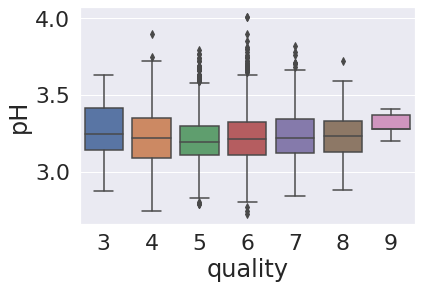

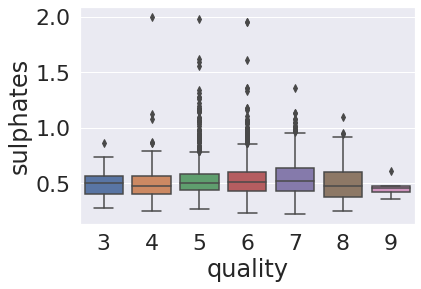

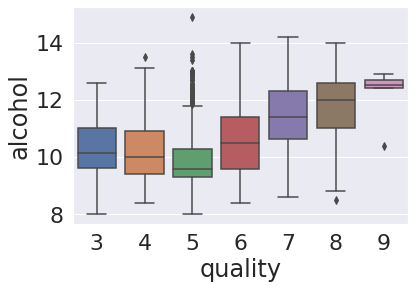

In [ ]:
# Podemos hacer box plots  # Los hice con todo el data set. Podemos repetir para tinto y blanco (Guada)
df_numericos = df[df.columns[1:12]]
cols_numericos = df_numericos.columns

for feature in cols_numericos:
    sns.boxplot(x=df["quality"] ,y= df_numericos[feature])
    plt.show()


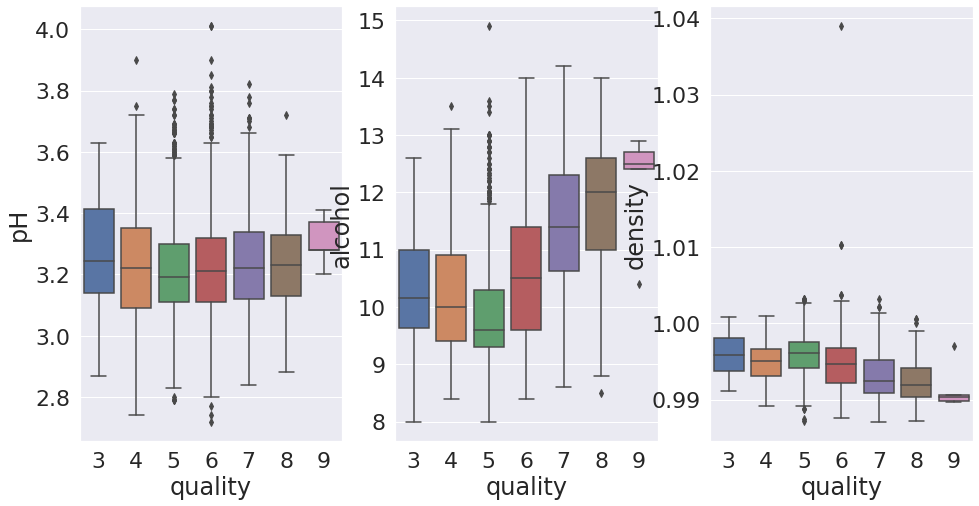

In [ ]:
# Graicamos solo algunos features dividiendolos según calidad
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
sns.boxplot(x=df["quality"] ,y= df_numericos['pH'], ax=ax[0])
sns.boxplot(x=df["quality"] ,y= df_numericos['alcohol'], ax=ax[1])
sns.boxplot(x=df["quality"] ,y= df_numericos['density'], ax=ax[2])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


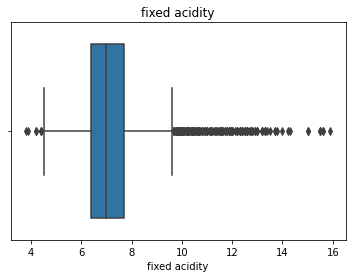

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


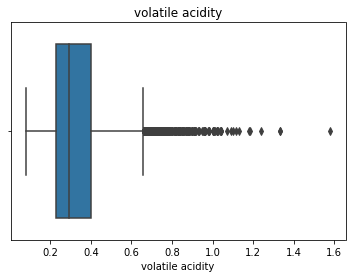

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


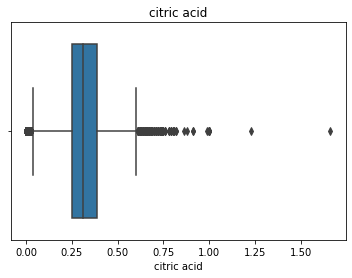

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


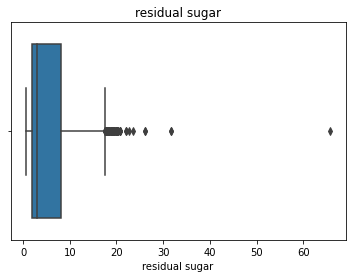

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


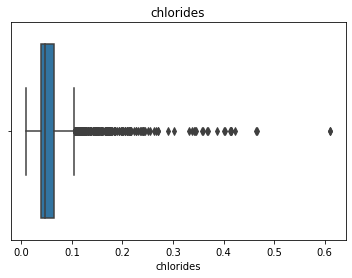

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


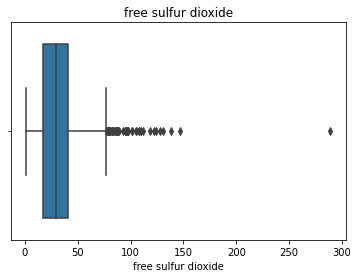

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


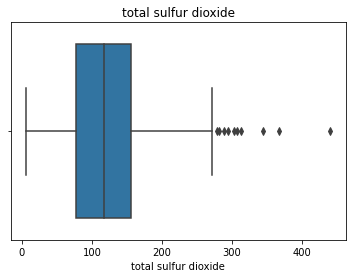

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


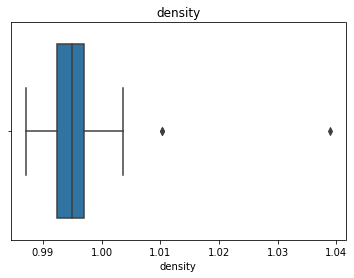

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


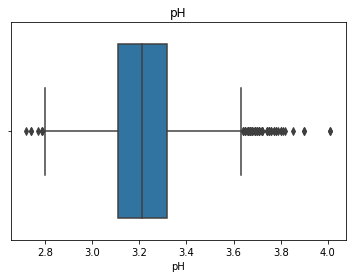

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


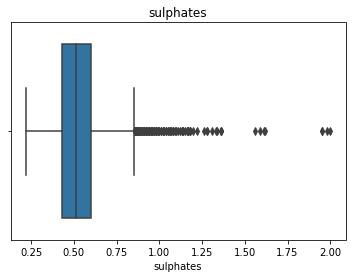

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


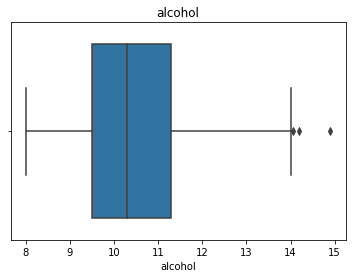

In [ ]:
# Podemos hacer boxplots de cada variable
df_numericos = df[df.columns[1:12]]
cols_numericos = df_numericos.columns

for feature in cols_numericos:
    sns.boxplot(df_numericos[feature]);
    plt.title(feature)
    plt.show();


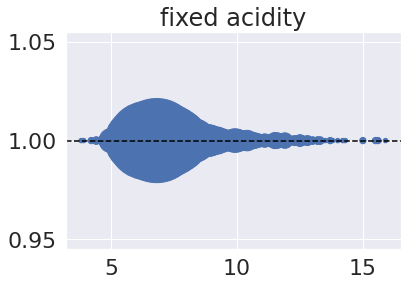

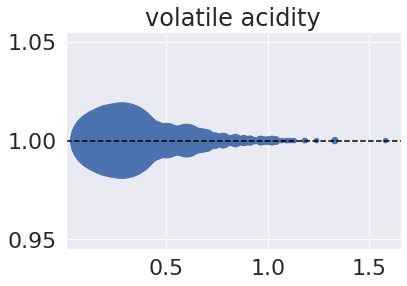

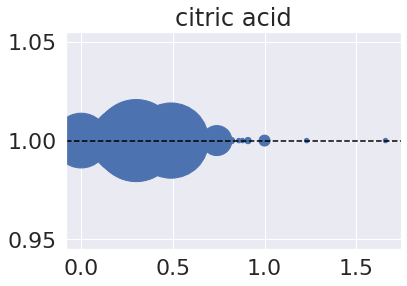

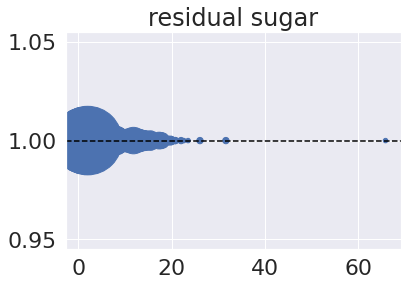

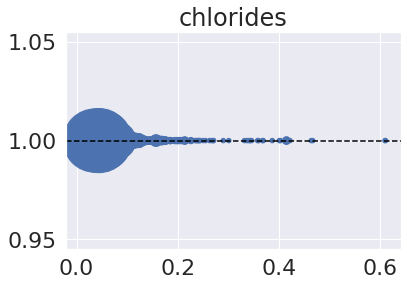

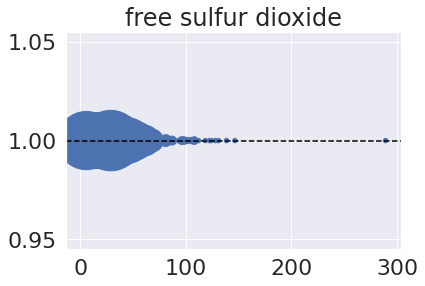

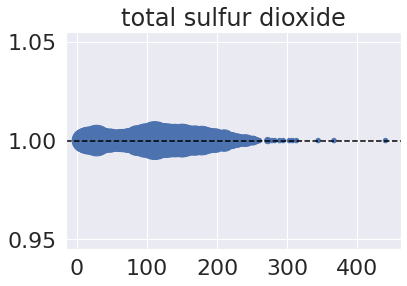

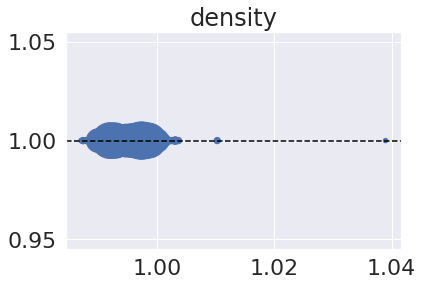

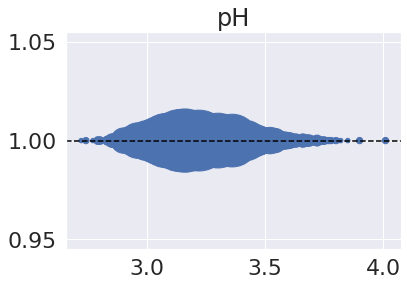

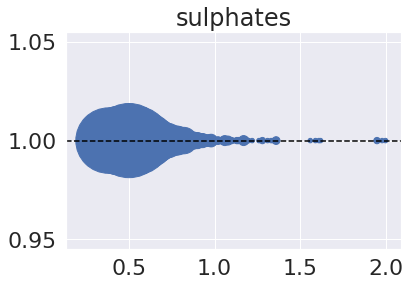

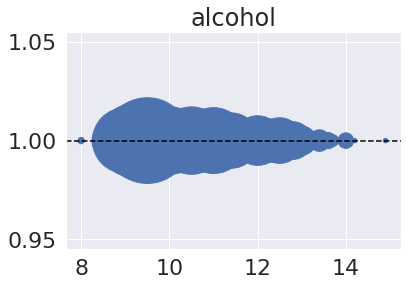

In [ ]:
# Otra posibilidad sería ver para cada feature, los valores que se alejan mas respecto la mayoría de los datos 
# y observar si son datos con "mucha" frecuencia o "poca" frecuencia 

for feature in cols_numericos:
  feature_unique, cuentas = np.unique(df_numericos[feature], return_counts=True)
  plt.axhline(1, color='black', linestyle='--')
  plt.scatter(feature_unique, np.ones(len(feature_unique)), s=cuentas*20)
  plt.title(feature)
  plt.show()


#Veamos los graficos de violines

AttributeError: ignored

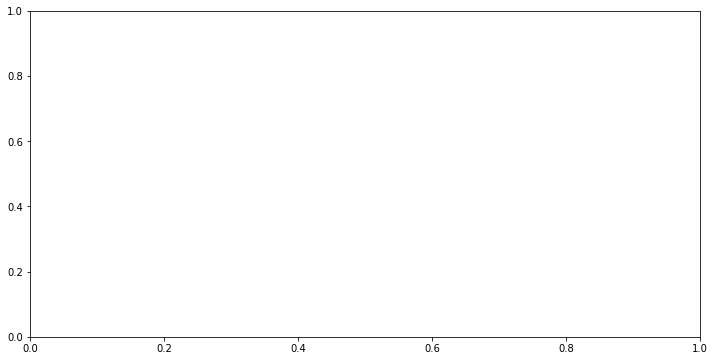

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

categories = df["quality"].unique()

#loc es para encontrar una fila por condicion
datos = [df.loc[(df["quality"] == cat)].df["alcohol"] for cat in categories]

#graficos de violin: cada perfil del violin es como el perfil
#del hisograma, y la raya marca la media (o sea, un histograma vertical,
#suavizado y reflejado)

ax.violinplot(dataset=datos, showextrema=True, showmeans=True, points=1000)
ax.xaxis.set_ticks(range(1, len(categories)+1))
ax.xaxis.set_ticklabels(categories)

ax.set_ylabel('Alcohol', fontsize=16)

# Intentemos un análisis de PCA

In [ ]:
df_no_na = df.copy()
df_no_na.dropna(inplace=True) # Quitamos los datos faltantes

X, t = df_no_na[df_no_na.columns[1:12]], df_no_na[['quality']] # Usamos todos los datos numéricos menos el target
colores = {3:'blue', 4:'orange', 5:'green', 6:'red', 7:'purple', 8:'brown', 9:'pink'}

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
X_2d.shape

(6463, 2)

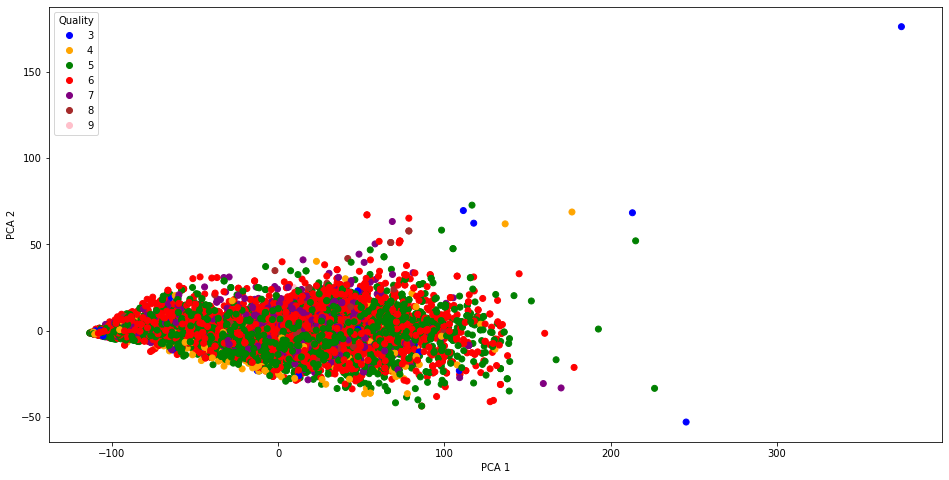

In [ ]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colores.values()]

plt.figure(figsize=(16,8))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(markers, colores.keys(), numpoints=1, title = 'Quality')
plt.scatter(*X_2d.T, c=t['quality'].map(colores)); 



A partir del análisis de PCA se ve que la mayoría de los datos están agrupados entre sí. Hay uno, arriba a la derecha, que parece diferente.
 
Al haber reducido las dimensiones, no podemos relacionar este valor con el conjunto original de forma directa. 


Aca estoy tratando de rastrear cual es ese punto que se va tan afuera
Para mi es la medicion #4745, con free sulfur cerca de 300 y total sulfur en 400.

In [ ]:
#df[df['quality']==3]
df[df['total sulfur dioxide']>400.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [ ]:
df[df['residual sugar']>60.]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,white,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [ ]:
pca.explained_variance_ratio_

# La primera componente principal explica el 95% de la varianza de los datos

array([0.95380002, 0.04058976])

In [ ]:
pca.components_
# notar que las coordenadas mas grandes son la 4,6,7, que son respectivamente:
# 4 residual sugar, 6 free sulfur dioxide, 7 total sulfur dioxide 

array([[-7.44793658e-03, -1.18499728e-03,  4.84406400e-04,
         4.10232111e-02, -1.68369619e-04,  2.30734076e-01,
         9.72106673e-01,  1.72353330e-06, -6.51523343e-04,
        -7.05165794e-04, -5.42570052e-03],
       [-5.29093666e-03, -7.93991905e-04, -2.53674270e-04,
         1.87582457e-02,  6.63702806e-05,  9.72595320e-01,
        -2.31666843e-01,  1.38125586e-06,  6.46220285e-04,
         3.42956872e-04,  2.77795150e-03]])

In [ ]:
# Invertimos la transformación
X_2d_inv = pca.inverse_transform(X_2d)


In [ ]:
# Error de reconstrucción
np.mean(np.sum(np.square(X_2d_inv - X), axis=1))

19.837367666829124

#Graficos de color

In [ ]:
#X, t = data['data'], data['target']
#names = data['feature_names']
#class_names=data['target_names']

#df_no_na = df.copy()
#df_no_na.dropna(inplace=True) # Quitamos los datos faltantes
#X, t = df_no_na[df_no_na.columns[1:12]], df_no_na[['quality']] # Usamos todos los datos numéricos menos el target
#colores = {3:'blue', 4:'orange', 5:'green', 6:'red', 7:'purple', 8:'brown', 9:'pink'}

X.shape, t.shape

((6463, 11), (6463, 1))

TypeError: ignored

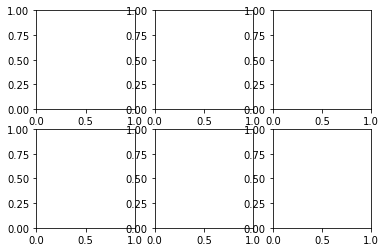

In [ ]:
fig, axs = plt.subplots(2,3)

for ax,(i,j) in zip(axs.flatten(),[(0,1),(2,3),(0,2),(1,3),(0,3), (1,2)]):
    ax.scatter(X[:,i], X[:,j],c=t,cmap=plt.cm.RdYlBu)
    ax.scatter(X[t==3][0,i],X[t==3][0,j],c=colors[0],label=class_names[0])
    ax.scatter(X[t==4][0,i],X[t==2][0,j],c=colors[1],label=class_names[1])
    ax.scatter(X[t==5][0,i],X[t==2][0,j],c=colors[2],label=class_names[2])
    ax.set_xlabel(names[i])
    ax.set_ylabel(names[j])
axs[-1,-1].legend(loc='upper right')
fig.set_size_inches(10,5)
fig.tight_layout()
plt.show()

In [ ]:
columnas = df.columns
columnas

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Text(0, 0.5, 'free sulfur dioxide')

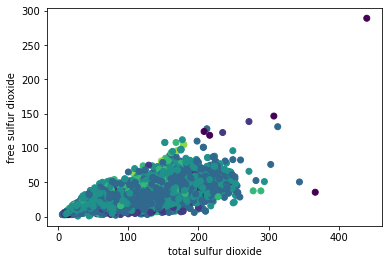

In [ ]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colores.values()]
plt.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'],c=df['quality'])
#plt.figure(figsize=(16,8))
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
#plt.legend(markers, colores.keys(), numpoints=1, title = 'Quality');

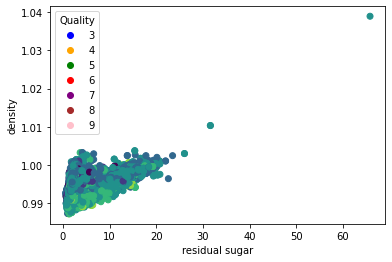

In [ ]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colores.values()]
plt.scatter(df['residual sugar'], df['density'],c=df['quality'])
#plt.figure(figsize=(16,8))
plt.xlabel('residual sugar')
plt.ylabel('density')
plt.legend(markers, colores.keys(), numpoints=1, title = 'Quality');

In [ ]:
df[df['quality']>8]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


# Preparamos los datos para ML

Aquí vamos a imputar los datos con su media, aunque yo (ele) mi inclino más por tirar las filas con nulos, porque muchos histogramas dieron muy asimetricos, por lo que no se que tan representativa es la media...

Normalizar los datos restandole su media y dividiendo por su desviacion estandar.

Pasar la variable categórica de tipo de vino (blanco o tinto) a numerica usando onehotencoder, ya que no tiene orden esta categoria

Luego, buscaremos usar algun algoritmo para clasificacion.

In [4]:
#Hacemos un copy del dataset para pasar la variable categorica a numerica
df2 = df.copy()

In [ ]:
#ohe = OneHotEncoder()
#y fit_transform y solo la feature que me interesa
#df2_ohesobreeltype = ohe.fit_transform(df2[['type']])

In [ ]:
#la transformas en un array
#df2_ohesobreeltype.toarray()

In [ ]:
#print(df2)

In [5]:
#primero me separo las etiquetas (el target)
df2_labels = df2["quality"].copy()

#separo los features: le saco el target
df2 = df2.drop("quality", axis=1) # drop labels for training set

# armo uno solo con el categorico, que voy a tener que preprocesar
df2_cat = df2[["type"]]

# y al resto le saco el categorico asi ya me quedan los numericos
df2_num = df2.drop("type", axis=1)

In [6]:
#primero tengo este pipeline numerico, que hace dos acciones consecutivas: primero rellena
#los valores faltantes (con SimpleImputer) y despues estandariza (con StandardScaler)
#lo bueno es que se lo pasas a todas las columnas numericas, no una por una como antes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),#hay mas opciones aca
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(df2_num)
cat_attribs = ["type"]

#aca juntas dos flujos distintos:
#el full_pipeline junta el num_pipeline, que se concentra en los atributos num_attribs y los pega, por eso
#pone el ColumnTransformer, a otro paso mas que es el onehotencoder aplicados a los atributos categoricos
#
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [7]:
#
df2_transformed = full_pipeline.fit_transform(df2)

In [ ]:
df2_transformed.shape

(6497, 13)

In [ ]:
df2_transformed[0]

array([-0.16689773, -0.42316799,  0.28427265,  3.20700497, -0.31513916,
        0.81556531,  0.9599756 ,  2.10221365, -1.35958954, -0.54586788,
       -1.41855821,  0.        ,  1.        ])

In [ ]:
sum(df2_transformed[:,-2])#+sum(df2_transformed[:,-2])

1599.0

In [ ]:
# porcentaje de vinos tinto
sum(df2_transformed[:,-2])/(sum(df2_transformed[:,-1])+sum(df2_transformed[:,-2]))

0.2461135908881022

In [ ]:
# porcentaje de vinos blancos
sum(df2_transformed[:,-1])/(sum(df2_transformed[:,-1])+sum(df2_transformed[:,-2]))
#la ultima columna es blanco, y la anteultima el tinto

0.7538864091118977

In [15]:
#df_no_na = df2_transformed.copy()
#df_no_na.dropna(inplace=True) # Quitamos los datos faltantes

#X, 
t = df2_labels  # Usamos todos los datos numéricos menos el target
colores = {3:'blue', 4:'orange', 5:'green', 6:'red', 7:'purple', 8:'brown', 9:'pink'}

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(df2_transformed)

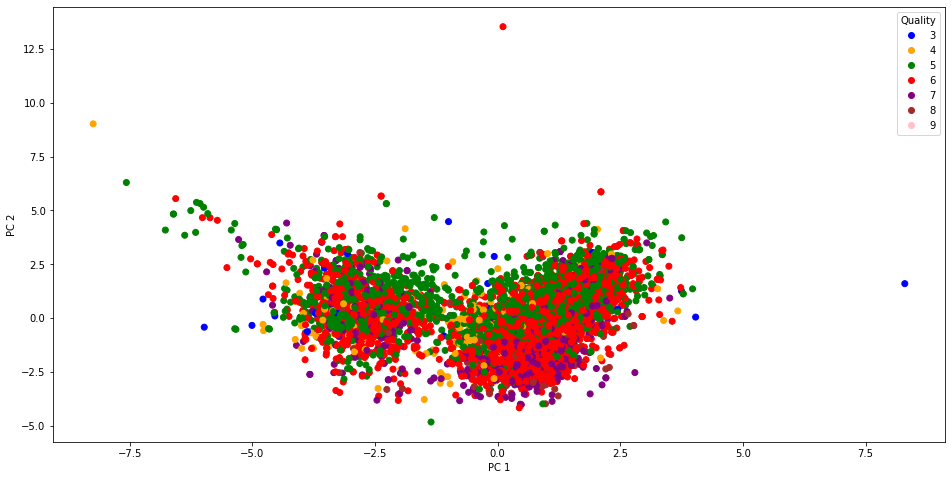

In [20]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colores.values()]

plt.figure(figsize=(16,8))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(markers, colores.keys(), numpoints=1, title = 'Quality')
plt.scatter(*X_2d.T, c=t.map(colores)); 



In [19]:
pca.explained_variance_ratio_


array([0.29018865, 0.22106083])

# Problema a resolver. Tipo de problema (clasificación / regresión), estrategia propuesta a priori.

El problema a resolver es si podemos inferir la calidad del vino, que hasta aquí es un dato sensorio (lo efectúa un catador), a partír de los datos de distintos análisis químicos.

El tipo de problema es de clasificación, ya que la calidad del vino (el target) viene dada por números naturales entre el 0 (muy baja calidad) al 10 (muy alta calidad).

Nuestra estrategia para resolver este problema va a ser entrenar un algoritmo de ............. (--saben nombres de algoritmos? hasta ahora no vimos solamente regresion lineal? )